<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n120.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,68.818321,2.006185,174.598262,172.584456,2.013805
1,0.0,1.0,31.139984,40.313758,-0.586546,80.867196,81.261037,-0.393842
2,0.0,2.0,70.668177,70.207028,0.721576,151.596781,150.850796,0.745985
3,0.0,3.0,54.323744,89.328550,0.515434,154.167728,153.694467,0.473261
4,0.0,4.0,94.833967,36.421622,-0.580967,140.674622,141.108888,-0.434266
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.847897,69.039561,0.691490,158.578948,157.953968,0.624980
119996,999.0,116.0,79.463199,93.662634,-0.095101,183.030731,183.196907,-0.166176
119997,999.0,117.0,69.735112,89.404665,1.130951,170.270728,169.188255,1.082473
119998,999.0,118.0,44.410224,95.028284,0.698921,150.137429,149.430313,0.707117


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.773755,68.818321,2.006185,174.598262,172.584456,2.013805
1,0.0,1.0,31.139984,40.313758,-0.586546,80.867196,81.261037,-0.393842
2,0.0,2.0,70.668177,70.207028,0.721576,151.596781,150.850796,0.745985
3,0.0,3.0,54.323744,89.328550,0.515434,154.167728,153.694467,0.473261
4,0.0,4.0,94.833967,36.421622,-0.580967,140.674622,141.108888,-0.434266
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,78.847897,69.039561,0.691490,158.578948,157.953968,0.624980
119996,999.0,116.0,79.463199,93.662634,-0.095101,183.030731,183.196907,-0.166176
119997,999.0,117.0,69.735112,89.404665,1.130951,170.270728,169.188255,1.082473
119998,999.0,118.0,44.410224,95.028284,0.698921,150.137429,149.430313,0.707117


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.773755  68.818321  2.006185  174.598262  172.584456  2.013805
      1.0    31.139984  40.313758 -0.586546   80.867196   81.261037 -0.393842
      2.0    70.668177  70.207028  0.721576  151.596781  150.850796  0.745985
      3.0    54.323744  89.328550  0.515434  154.167728  153.694467  0.473261
      4.0    94.833967  36.421622 -0.580967  140.674622  141.108888 -0.434266
...                ...        ...       ...         ...         ...       ...
999.0 115.0  78.847897  69.039561  0.691490  158.578948  157.953968  0.624980
      116.0  79.463199  93.662634 -0.095101  183.030731  183.196907 -0.166176
      117.0  69.735112  89.404665  1.130951  170.270728  169.188255  1.082473
      118.0  44.410224  95.028284  0.698921  150.137429  149.430313  0.707117
      119.0  31.300855  72.284956  0.748189  114.333999  113.544975  0.789025

[120000 rows x 6 columns]

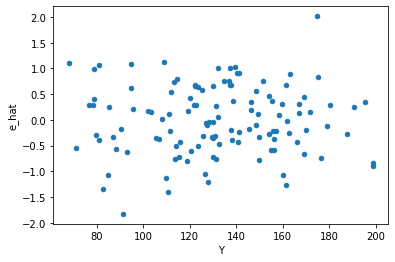

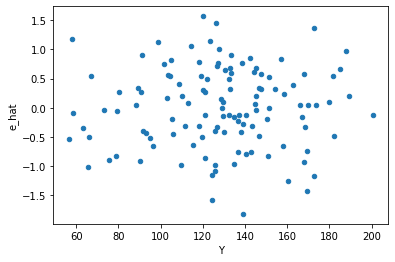

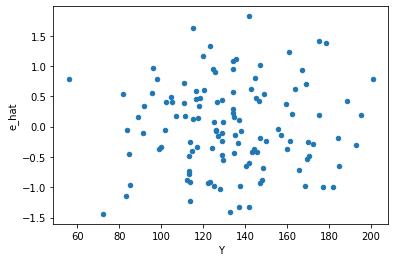

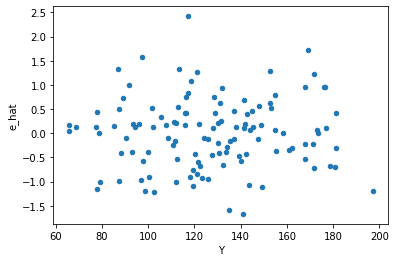

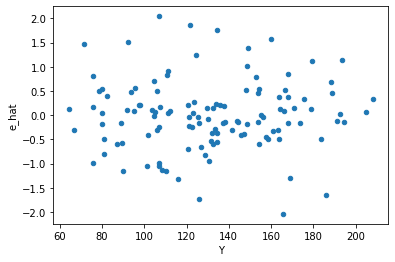

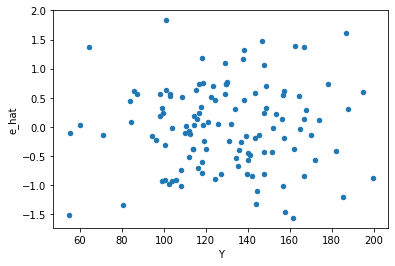

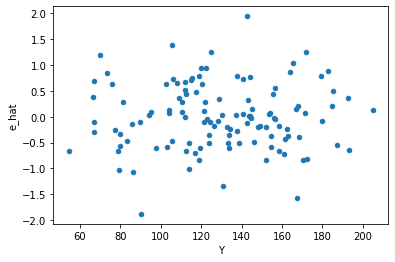

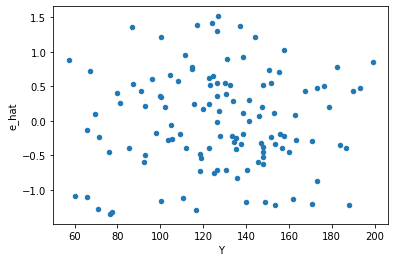

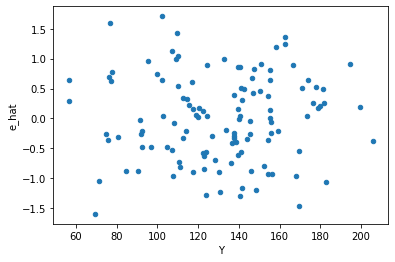

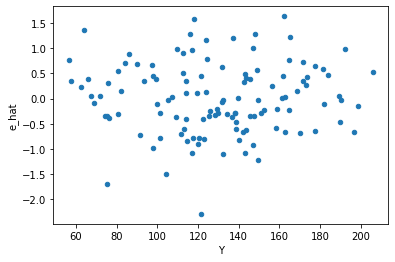

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,45.0,71.0,18.637268106531067,35.35592514569219,0.41416151347846814,0.49797077669989,1.2023588877622233,0.48062097766589873,0.7596895111670506,0.24031048883294936,Reject001=1 : Homoscedasticity
2.0,73.0,43.0,36.17246853742123,24.33304538159984,0.4955132676359073,0.5658847763162754,1.142017405540139,0.6456024921610395,0.6771987539194803,0.32280124608051974,Reject001=1 : Homoscedasticity
4.0,47.0,69.0,21.958635141984892,39.23752743846116,0.46720500302095513,0.5686598179487125,1.2171526723210344,0.4517800194733812,0.7741099902633094,0.2258900097366906,Reject001=1 : Homoscedasticity
5.0,62.0,54.0,28.639070711702658,32.531057293936016,0.46192049535004287,0.6024269869247411,1.304178950683326,0.3202422913387999,0.8398788543306,0.16012114566939994,Reject001=1 : Homoscedasticity
6.0,57.0,59.0,21.03220799828885,23.911792045458196,0.36898610523313774,0.4052846109399694,1.0983736384433693,0.7209042626648898,0.6395478686675551,0.3604521313324449,Reject001=1 : Homoscedasticity
7.0,73.0,43.0,32.76078831812118,24.710378028001486,0.44877792216604356,0.5746599541395695,1.2804996096197236,0.3835456482801667,0.8082271758599167,0.19177282414008334,Reject001=1 : Homoscedasticity
8.0,64.0,52.0,31.217097482041886,29.114754386957937,0.4877671481569045,0.5598991228261142,1.1478819861931464,0.6103718009761263,0.6948140995119368,0.30518590048806316,Reject001=1 : Homoscedasticity
9.0,60.0,56.0,22.950814885283815,33.06476973798578,0.3825135814213969,0.590442316749746,1.5435852357338495,0.10277829240413183,0.9486108537979341,0.051389146202065916,Reject001=1 : Homoscedasticity
10.0,52.0,64.0,17.246326577671073,25.516195079316255,0.3316601264936745,0.3986905481143165,1.202105759077193,0.4808046863233919,0.759597656838304,0.24040234316169595,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,64.0,52.0,29.60129525040263,19.254386716790908,0.4625202382875411,0.37027666763059436,0.8005631688713253,0.3951415322531685,Reject001=1 : Homoscedasticity
1.0,45.0,71.0,18.637268106531067,35.35592514569219,0.41416151347846814,0.49797077669989,1.2023588877622233,0.48062097766589873,Reject001=1 : Homoscedasticity
2.0,73.0,43.0,36.17246853742123,24.33304538159984,0.4955132676359073,0.5658847763162754,1.142017405540139,0.6456024921610395,Reject001=1 : Homoscedasticity
3.0,58.0,58.0,35.20940177196413,27.1178201486743,0.6070586512407609,0.46754862325300517,0.7701869041770304,0.3228335215401569,Reject001=1 : Homoscedasticity
4.0,47.0,69.0,21.958635141984892,39.23752743846116,0.46720500302095513,0.5686598179487125,1.2171526723210344,0.4517800194733812,Reject001=1 : Homoscedasticity
5.0,62.0,54.0,28.639070711702658,32.531057293936016,0.46192049535004287,0.6024269869247411,1.304178950683326,0.3202422913387999,Reject001=1 : Homoscedasticity
6.0,57.0,59.0,21.03220799828885,23.911792045458196,0.36898610523313774,0.4052846109399694,1.0983736384433693,0.7209042626648898,Reject001=1 : Homoscedasticity
7.0,73.0,43.0,32.76078831812118,24.710378028001486,0.44877792216604356,0.5746599541395695,1.2804996096197236,0.3835456482801667,Reject001=1 : Homoscedasticity
8.0,64.0,52.0,31.217097482041886,29.114754386957937,0.4877671481569045,0.5598991228261142,1.1478819861931464,0.6103718009761263,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64